In [13]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

# Creating model object and indicating path
data_path = "../../../input/BES/stratbr_grid_v3/gempy_format/"
geo_model = gp.create_model("StratBR_BES_v3")

## Step by step

In [14]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[0, 179000, 0, 148000, -17000, 0],
    resolution=[50, 50, 50],
    path_i=data_path + "merged_89_99_sp_reduced_more.csv",
    path_o=data_path + "orientations_points_v3_3.csv",
)

Active grids: ['regular']


StratBR_BES_v3  2023-09-21 15:38

In [15]:
gp.get_data(
    geo_model,
    "surfaces",
)

,surface,series,order_surfaces,color,id
0,bes_89,Default series,1,#015482,1
1,bes_99,Default series,2,#9f0052,2
2,basement,Basement,1,#ffbe00,3


In [16]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series": (
            "bes_89",
            "bes_99",
        ),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,bes_89,Strat_Series,1,#015482,1
1,bes_99,Strat_Series,2,#9f0052,2
2,basement,Basement_series,1,#ffbe00,3


In [17]:
geo_model.get_data()

X         Y      Z    smooth surface   
surface_points 0          0.0       0.0  -3336  0.000002  bes_89  \
               2      10000.0       0.0  -4367  0.000002  bes_89   
               4      20000.0       0.0  -4070  0.000002  bes_89   
               6      30000.0       0.0  -4548  0.000002  bes_89   
               8      40000.0       0.0  -4780  0.000002  bes_89   
...                       ...       ...    ...       ...     ...   
               1171  150000.0  148000.0 -11915  0.000002  bes_99   
               1173  160000.0  148000.0 -12294  0.000002  bes_99   
               1175  170000.0  148000.0 -12485  0.000002  bes_99   
               1177  179000.0  148000.0 -12506  0.000002  bes_99   
orientations   0       5000.0   90000.0  -2000  0.010000  bes_89   

                              G_x           G_y  G_z  
surface_points 0              NaN           NaN  NaN  
               2              NaN           NaN  NaN  
               4              NaN           NaN  NaN  
               6              NaN           NaN  NaN  
               8              NaN           NaN  NaN  
...                           ...           ...  ...  
               1171           NaN           NaN  NaN  
               1173           NaN           NaN  NaN  
               1175           NaN           NaN  NaN  
               1177           NaN           NaN  NaN  
orientations   0     1.000000e-12  1.000000e-12  1.0  

[1179 rows x 8 columns]

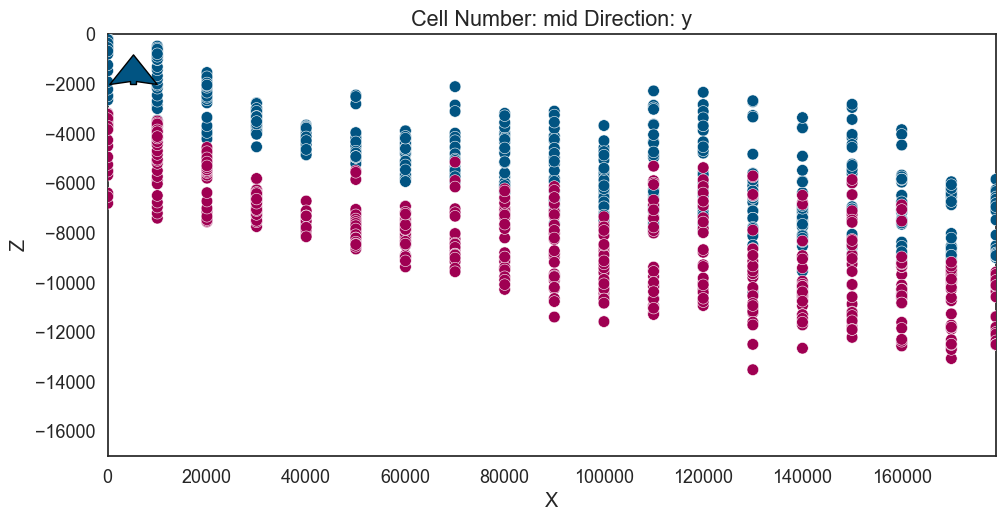

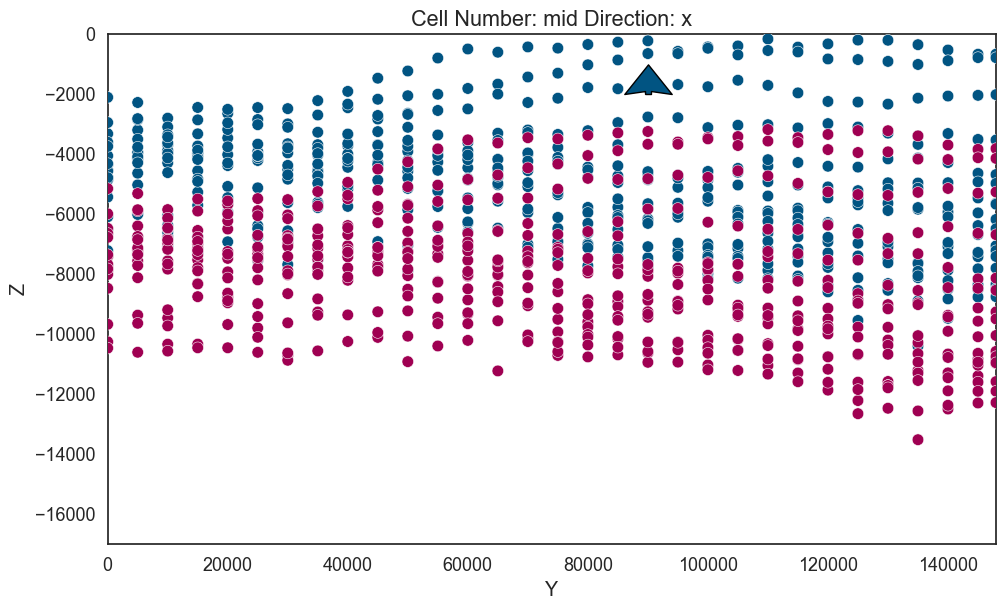

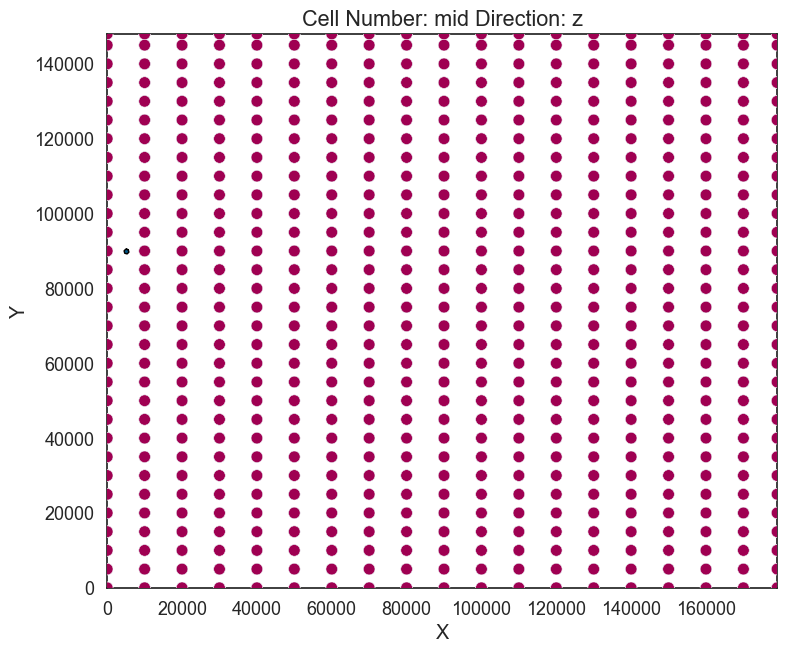

In [18]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=5, legend=False)
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=5, legend=False)
gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [19]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="basic",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
    ve=2,
)

In [20]:
%%time
gp.set_interpolator(
    geo_model, 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
)

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                             values
range                232881.944341
$C_o$            1291285714.285714
drift equations             [3, 3]
CPU times: total: 16.5 s
Wall time: 17 s


In [21]:
%%time
gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

CPU times: total: 2min 48s
Wall time: 23.3 s



Lithology ids 
  [3. 3. 3. ... 1. 1. 1.] 

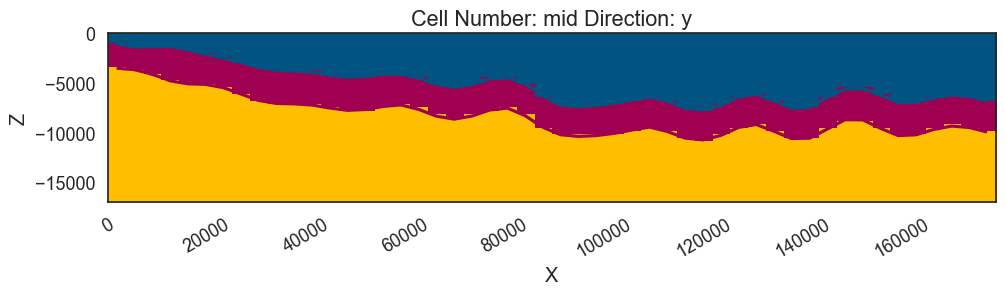

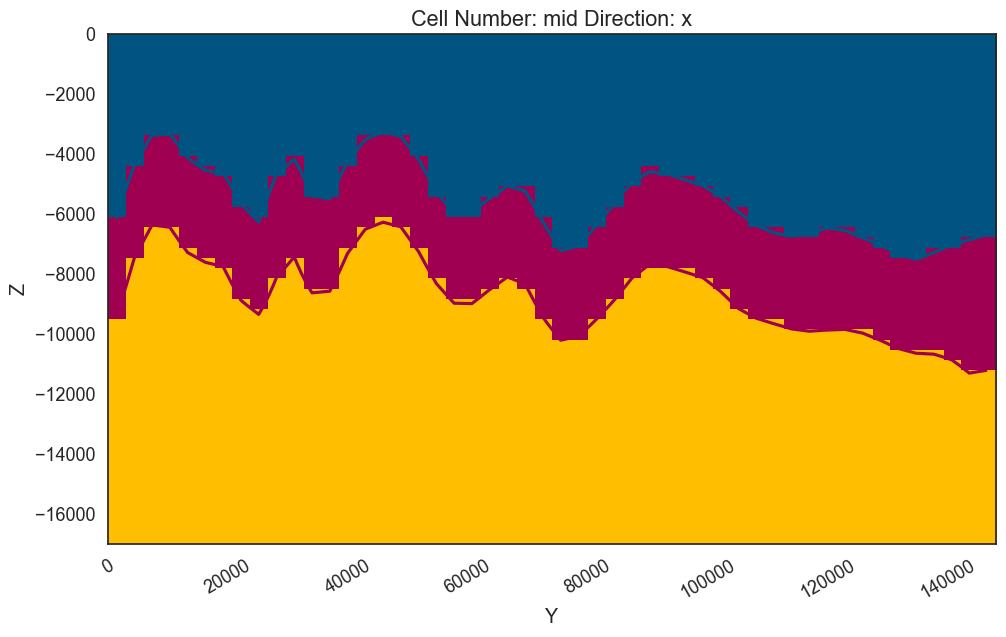

In [24]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True, ve=2, legend=True)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=5,
    legend=True,
)

In [26]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="basic", show_data=False, ve=2)

In [ ]:
topo_init = tp.compute_topology(
    geo_model, direction="x", voxel_threshold=1
)  # , direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 1, topo_init[0], topo_init[1]
)

In [ ]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)

In [ ]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    path="../../../output/",
    compress=True,
)